# Import Necessary Libraries

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Set seed for reproducibility

In [24]:
np.random.seed(42)

# Load the data as text file

In [25]:
data = np.loadtxt('em_data.txt', dtype=int)

# Print Data and its Shape

In [26]:
print('-----------------Data-----------------')
print(data)

print('-----------------Data Shape-----------------')
print(data.shape)

-----------------Data-----------------
[ 0  2  0  1  4  8  3  3  3  3  7  9  4  8  1  4  2  0  4  0  7  1  1  3
  6  3  1  5  5  5  5  3  8  4  3  1  1  6  1  5  3  6  3  5  3  2  1  1
  1  0  5  2  0  9  1  3  2  4  0  5  5  0  1  1  2  1 10  9  2  5  5  0
  5  2  2  3  7  1  2  4  0  9  7  3  6  7  2  2  5  4  1  2  3  2  4  1
  3  3  7  1  7  6  3  0  7  2  4  3  1  3  5  1  8  2  1 11  5  4  3  1
  1  3  2  5  1  2  5  3  0  9  6  4  0  2  2  5  8  4  3  4  1  3  8  7
  4  1  0  7  8  4  3  5  0  4  4  2  7  7  3  0  6  1  5  6  3  6  2  3
  5  4  7  7  7  6  1  6  7  2  1  1  5  9  0  7  5  5 12  6  5  8  0  6
  4  1  9  2  8  5  4  3  3  5  6  0  4  2  3  7  8  3  7  4  3  5  5  2
  3  0  5  1  6  6  3  6  7  3  6  1  3  3  5  5  4  4  7  3  9  7  6  9
  1  4  2  3  4  3  3  1  4  6  3  3  1  1  2 10  5  7  8  3  7  1  6  5
  3  6  6  0  1  3  2  1  3  4  3  2  2  3  4  6  5  0  6  1  3  4  4  5
  5  3  2  3  8  6  6  6  1  6  4  3  4  5  2  4  6  4  4  5  2  4  2  3
  4  8  4  3

# Function to calculate Poisson Distribution given data and parameter (lambda)

In [27]:
def getPoissonProbablityForSingleData(singleData, mean):
    return np.exp(-mean) * np.power(mean, singleData) / math.factorial(singleData)

# Function to calculate Log Likelihood given data and parameter (lambda)

In [28]:
def getLogLikelihood(data, means, pis):
    likelihoods = np.array([[getPoissonProbablityForSingleData(i, mean) for mean in means] for i in data])
    return np.sum(np.log(np.dot(likelihoods, pis)))

# Function to do EM Algorithm for Mixtures of Poisson Distribution

In [29]:
def mixture_poisson_em(data, num_components=2, max_iter=1000, eps=1e-8):
    # initialize parameters
    pis = np.random.rand(num_components)
    pis /= np.sum(pis)

    means = np.random.rand(num_components)
    
    converge_cnt = 5
    prev_log_likelihood = -np.inf
    log_likelihoods = [None] * max_iter

    for iter in range(max_iter):
        # E step
        probs_components = np.array([[getPoissonProbablityForSingleData(i, mean) for mean in means] for i in data])
        probs_components = probs_components * pis
        probs_components /= np.sum(probs_components, axis=1, keepdims=True)

        # M step
        effective_counts = np.sum(probs_components, axis=0)
        pis = effective_counts / len(data)
        means = np.sum(probs_components * data[:, None], axis=0) / effective_counts

        # calculate log likelihood
        log_likelihoods[iter] = getLogLikelihood(data, means, pis)
        if(log_likelihoods[iter] - prev_log_likelihood < eps):
            converge_cnt -= 1
            if converge_cnt == 0:
                print('Converged after {} iterations'.format(iter))
                break
        prev_log_likelihood = log_likelihoods[iter]

    return pis, means, log_likelihoods

In [30]:
pis, means, log_likelihoods = mixture_poisson_em(data, num_components=2)
print('-----------------Proportions-----------------')
print(pis)
print('-----------------Means-----------------')
print(means)

Converged after 178 iterations
-----------------Proportions-----------------
[0.64398094 0.35601906]
-----------------Means-----------------
[4.91073719 1.78242942]


In [31]:
family_with_planning_advice = np.argmin(means)
family_without_planning_advice = np.argmax(means)

print('Estimated Mean Number of Children for Family with Family Planning Advice: {}'.format(means[family_with_planning_advice]))
print('Estimated Mean Number of Children for Family without Family Planning Advice: {}'.format(means[family_without_planning_advice]))

print('Estimated Proportions of Families with Family Planning Advice: {:.2f}%'.format(pis[family_with_planning_advice] * 100))
print('Estimated Proportions of Families without Family Planning Advice: {:.2f}%'.format(pis[family_without_planning_advice] * 100))

Estimated Mean Number of Children for Family with Family Planning Advice: 1.7824294239512446
Estimated Mean Number of Children for Family without Family Planning Advice: 4.910737191986101
Estimated Proportions of Families with Family Planning Advice: 35.60%
Estimated Proportions of Families without Family Planning Advice: 64.40%


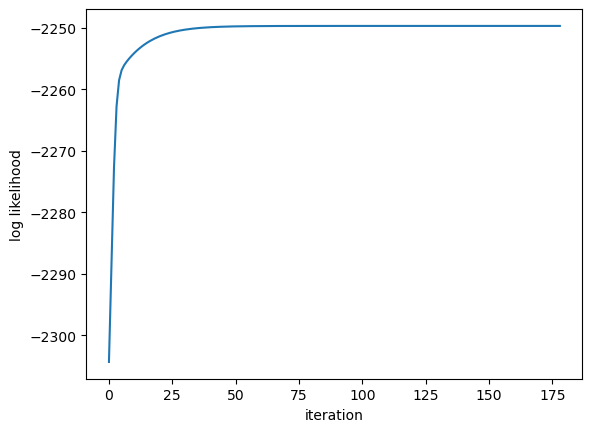

In [32]:
plt.plot(log_likelihoods)
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.show()

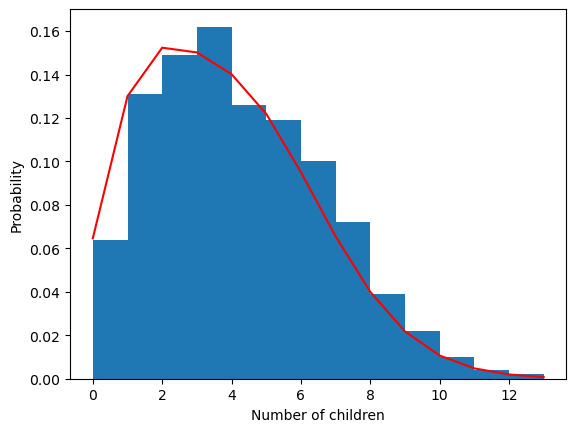

In [33]:
# draw frequency histogram of data
counts, bins = np.histogram(data, bins=range(np.max(data) + 1))
plt.hist(bins[:-1], bins, weights=counts / len(data))

# draw the estimated distribution
x = np.arange(0, np.max(data) + 1)
y = np.sum(np.array([[getPoissonProbablityForSingleData(i, mean) for mean in means] for i in x]) * pis, axis=1)
plt.plot(x, y, 'r-')

plt.xlabel('Number of children')
plt.ylabel('Probability')

plt.show()